## Actividad 03: Regresión
### Sebastián Hernández Mantilla

## Predicción del precio de la vivienda en Taiwan
####  El ejercicio de predicción fue desarrollado en python con ayuda de las librerías de Sickit Learn y Keras. La medida de error usada fue el error cuadratico medio (MSE).
#### El impacto de las variables para cada modelo se obtuvo de ScikitLearn y para la visualización de esto se tomó el valor absoluto. En primer lugar se hace un breve análisis visual de los datos y luego se presenta, para cada modelo, el código usado, el resultado del error y una gráfica con el impacto de las variables.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_excel('Real estate valuation data set.xlsx',index_col='No')
df.head()

X1 transaction date  X2 house age  ...  X6 longitude  Y house price of unit area
No                                     ...                                          
1           2012.916667          32.0  ...     121.54024                        37.9
2           2012.916667          19.5  ...     121.53951                        42.2
3           2013.583333          13.3  ...     121.54391                        47.3
4           2013.500000          13.3  ...     121.54391                        54.8
5           2012.833333           5.0  ...     121.54245                        43.1

[5 rows x 7 columns]

In [ ]:
average = df['Price'].mean()
print(average)

med = df['Price'].median()
print(med)

standard_deviation = df['Price'].std()
print(standard_deviation)

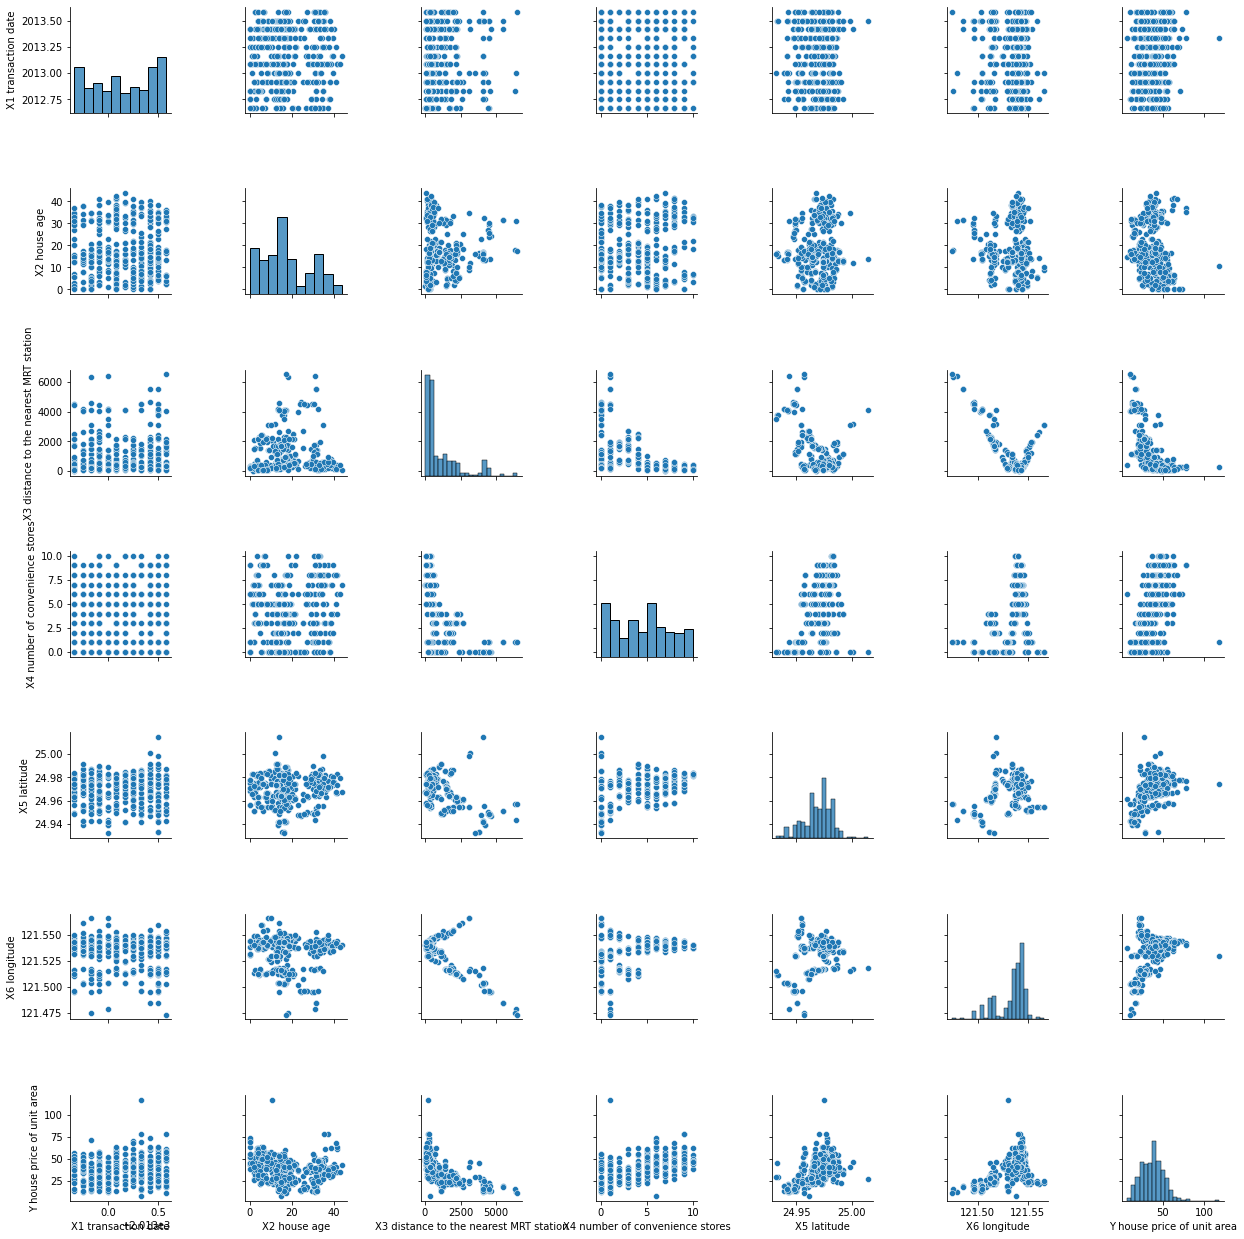

In [34]:
sns.pairplot(df)

In [36]:
average = df['Y house price of unit area'].mean()
print("Precio promedio")
print(average)
print('\n')

standard_deviation = df['Y house price of unit area'].std()
print("Desviación estandar del precio")
print(standard_deviation)

Precio promedio
37.98019323671498


Desviación estandar del precio
13.606487697735314


### Regresión linear clásica




In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x = df.drop(columns=['Y house price of unit area'],axis=1)
y = df['Y house price of unit area']

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=42)
reg = LinearRegression().fit(X_train,y_train)
y_pred = reg.predict(X_test)

print('Error MSE: ')
print(mean_squared_error(y_test, y_pred))
reg_coef = reg.coef_

Error MSE: 
53.50225236117862


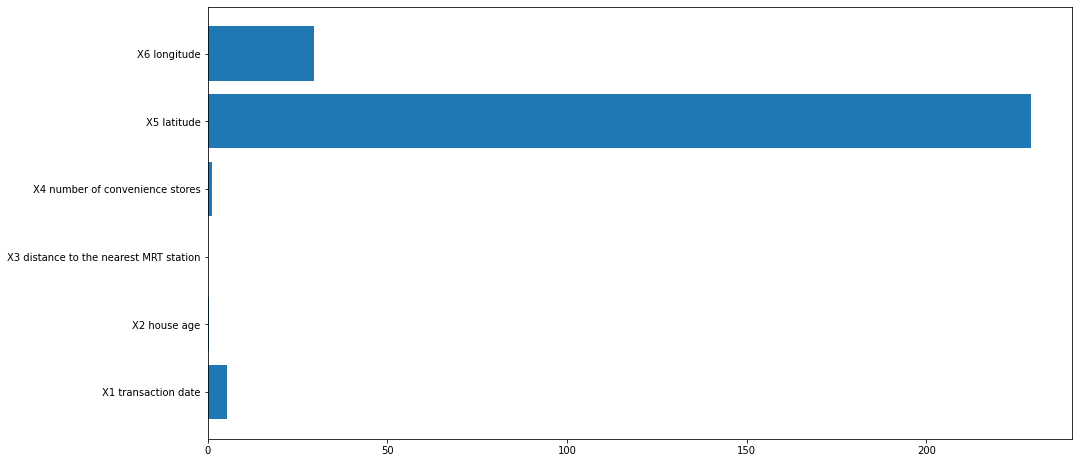

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])
variables = df.columns[0:-1]
importancia = np.absolute(reg.coef_)
ax.barh(variables,importancia)
plt.show()

### Regresión lineal Elastic Net

In [4]:
from sklearn.linear_model import ElasticNet
reg_elast = ElasticNet()
reg_elast.fit(X_train,y_train)
y_pred = reg_elast.predict(X_test)
print('Error MSE: ')
print(mean_squared_error(y_test, y_pred))
reg_elast_coef = reg_elast.coef_

Error MSE: 
59.59722132086818


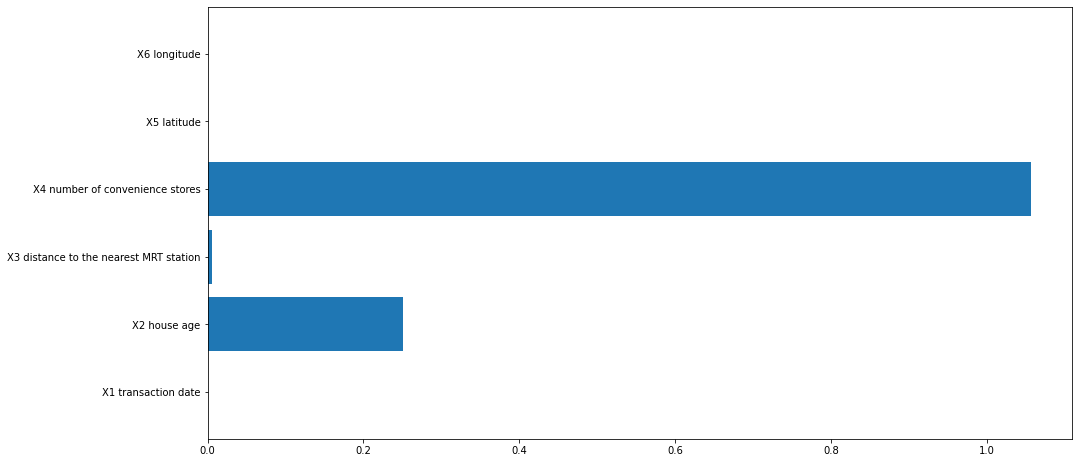

In [5]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])
variables = df.columns[0:-1]
importancia = np.absolute(reg_elast.coef_)
ax.barh(variables,importancia)
plt.show()

### Random Forest

In [6]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print('Error MSE: ')
print(mean_squared_error(y_test, y_pred))


Error MSE: 
32.98104331708834


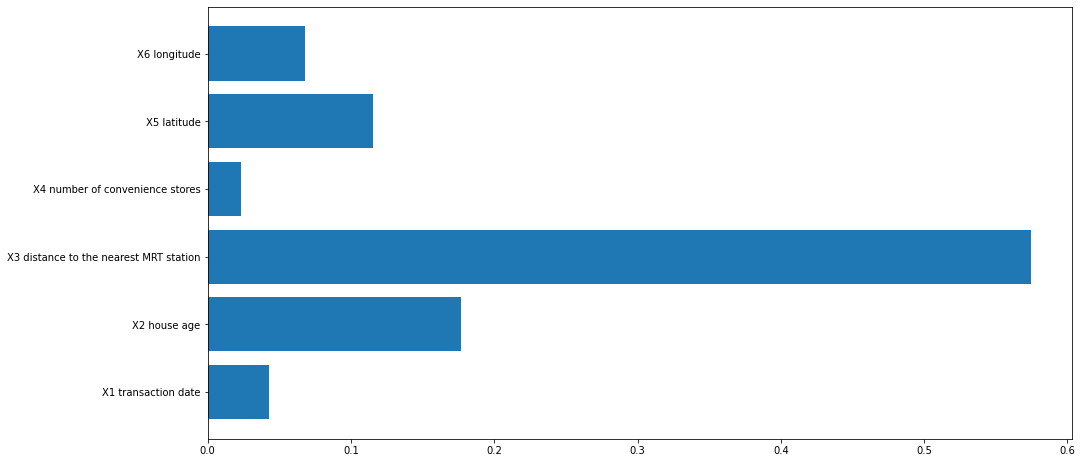

In [7]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])
variables = df.columns[0:-1]
importancia = np.absolute(random_forest.feature_importances_)
ax.barh(variables,importancia)
plt.show()

### XG Boost

In [8]:
from xgboost import XGBRegressor
xg = XGBRegressor(n_estimators=100, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)

xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

print('Error MSE: ')
print(mean_squared_error(y_test, y_pred))
xg_coef = xg.feature_importances_

[18:59:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Error MSE: 
34.70455433976067


In [9]:
xg_coef

array([0.0334417 , 0.08472455, 0.22568797, 0.10473609, 0.25279075,
       0.29861888], dtype=float32)

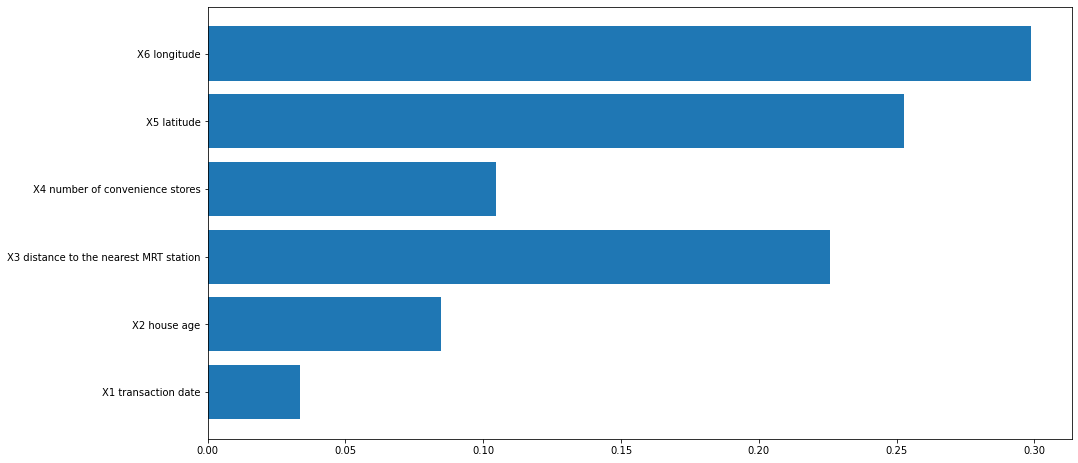

In [10]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])
variables = df.columns[0:-1]
importancia = np.absolute(xg.feature_importances_)
ax.barh(variables,importancia)
plt.show()

### Support Vectors Machines

#### Para SVM y la red neuronal se estandarizó la data usando la herramienta StandardScaler de sklearn, la ecuación usada en esta operación es:
y = (x – mean) / standard_deviation

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_y = df['Y house price of unit area']
scaled_x = scaler.fit_transform(df.drop(columns=['Y house price of unit area'],axis=1))

X_train,X_test,y_train,y_test = train_test_split(scaled_x,scaled_y,test_size = 0.2, random_state=42)

In [12]:
from sklearn.svm import SVR
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Error MSE: ')
print(mean_squared_error(y_test, y_pred))
#svm.coef_

Error MSE: 
54.98634955567108


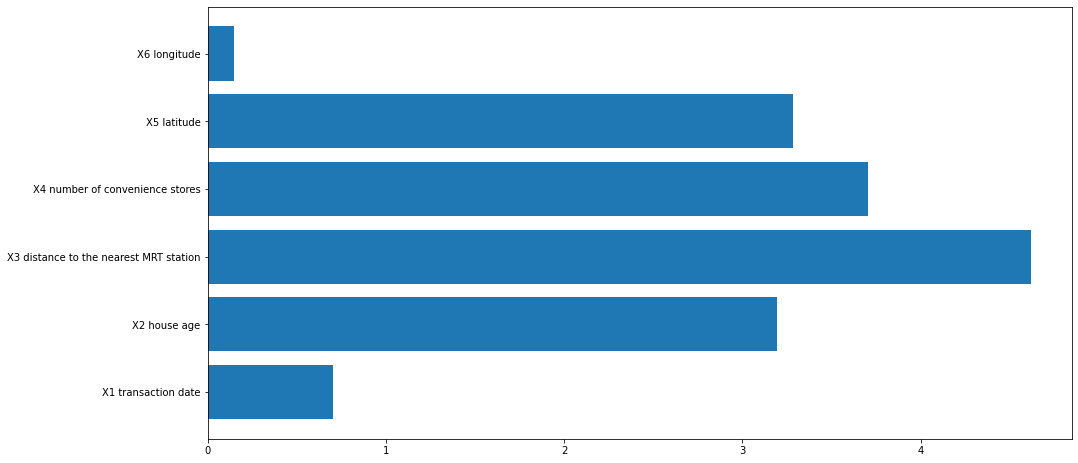

In [13]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])
variables = df.columns[0:-1]
importancia = np.absolute(svm.coef_[0])
ax.barh(variables,importancia)
plt.show()

### Red Neuronal
#### Se uso el MSE y el MAE como funciones de perdida

In [14]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=6, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
#model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
hist = model.fit(X_train, y_train, epochs=75, batch_size=50,  verbose=1, validation_split=0.2)
y_pred= model.predict(X_test)


Epoch 1/75
6/6 [==============================] - 14s 100ms/step - loss: 1577.2102 - mse: 1577.2102 - mae: 37.6826 - val_loss: 1922.5105 - val_mse: 1922.5105 - val_mae: 40.6614
Epoch 2/75
6/6 [==============================] - 0s 5ms/step - loss: 1637.0549 - mse: 1637.0549 - mae: 38.3193 - val_loss: 1920.5093 - val_mse: 1920.5093 - val_mae: 40.6372
Epoch 3/75
6/6 [==============================] - 0s 5ms/step - loss: 1621.2965 - mse: 1621.2965 - mae: 38.1823 - val_loss: 1918.6138 - val_mse: 1918.6138 - val_mae: 40.6152
Epoch 4/75
6/6 [==============================] - 0s 6ms/step - loss: 1631.2268 - mse: 1631.2268 - mae: 38.3148 - val_loss: 1916.6847 - val_mse: 1916.6847 - val_mae: 40.5936
Epoch 5/75
6/6 [==============================] - 0s 5ms/step - loss: 1516.6758 - mse: 1516.6758 - mae: 36.8403 - val_loss: 1914.6504 - val_mse: 1914.6504 - val_mae: 40.5705
Epoch 6/75
6/6 [==============================] - 0s 5ms/step - loss: 1570.4711 - mse: 1570.4711 - mae: 37.4584 - val_loss: 191

#### Para encontrar la importancia de las variables dada por la red neuronal se usó un array de zeros con un 1 en la posición donde se quería obtener el coeficiente y se predijo este array con el modelo anteriormente entrenado. 

In [26]:
RN_coef=np.zeros((1,6))
for i in range(0,6):
  inputs = np.zeros((1,6))
  inputs[0][i] = 1
  tmp_coef = model.predict(inputs)
  RN_coef[0][i] = tmp_coef
  #print(inputs)
RN_coef

array([[22.00492668, 14.76357937,  8.26590824, 23.52750969, 27.50346375,
        29.1417942 ]])

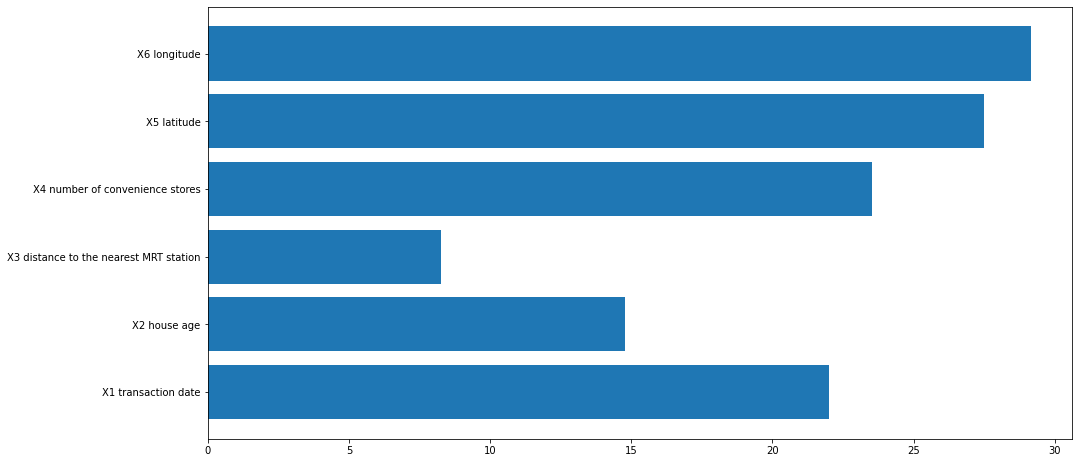

In [27]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])
variables = df.columns[0:-1]
importancia = np.absolute(RN_coef[0])
ax.barh(variables,importancia)
plt.show()

In [28]:
print('Error MSE: ')
print(mean_squared_error(y_test, y_pred))

Error MSE: 
178.25906258042215


### Preguntas adicionales

### **¿Qué variables tienen el mayor impacto en el precio de la vivienda? ¿Cómo aporta cada modelo al conocimiento de este impacto?**

#### Para la regresión lineal clásica se obtuvo que las variables más importante fueron las de ubicación, latitud y longitud, junto con la fecha de la transacción.
#### La regresión lineal Elastic le dio mas importancia a la cantidad de tiendas cercanas y la edad de la vivienda
#### En el random forest las variables con más peso fueron la distancia de la casa al transporte masivo, la edad de la casa y la ubicación, en comparación el XG Boost tuvo mas en cuenta la ubicación, la distancia de la casa al transporte masivo y la cantidad de tiendas cercanas
#### Para el entrenamiento de la red neuronal y el SVM se usó estandarizaron los datos, los resultados fueron:
#### En SVM, similar al random forest, la variable más importante fue la distancia de la casa al transporte masivo, la latitud y la edad de la casa 

#### La red neuronal tuvo más en cuenta la ubicación (longitud y latitud) y la cantidad de tiendas cercanas.  






### **¿Cuál es el mejor modelo entre los usados para resolver este problema? ¿Qué criterios se pueden utilizar para responder a esta pregunta?**

#### En el ejercicio se dividió el data set en datos de entrenamiento y de testeo en un ratio de 80-20, la medida de error usada fue el MSE, según esto, los modelos que menor error tuvieron fueron los arreglos de arboles:
* Random forest, MSE = 33.7
* XG Boost, MSE = 34.7

#### Otras medidas comunmente usadas para medir el nivel de error en modelos de regresión son RMSE y MAE, (muy parecidos al error MSE usado en la actividad), y el coeficiente de determinación (R²)
